Social Network Analysis, usually referred to as SNA, models and studies the relationships of a group of social entities, which exist in the form of a network.

Basically, a graph is a data structure that's able to represent relations in a collection of objects. Under this paradigm, the objects are the graph's nodes and the relations are the graph's links (or edges). The graph is directed if the links have an orientation (conceptually, they're like the one-way streets of a city); otherwise, the graph is undirected.

In [1]:
%matplotlib inline
import community
import networkx as nx
import matplotlib.pyplot as plt

## Introduction to graph theory

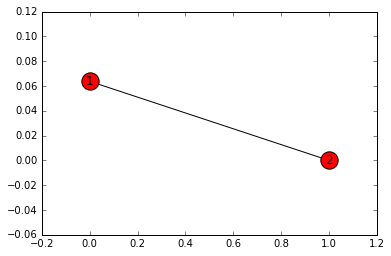

In [2]:
G = nx.Graph()
G.add_edge(1,2)
nx.draw_networkx(G)
plt.show()

we will first define a (NetworkX)
graph object (by default, it's an undirected one). Then, we will add an edge (that
is, a connection) between two nodes (since the nodes are not already in the graph,
they're automatically created). Finally, we will plot the graph. The graph layout (the
positions of the nodes) is automatically generated by the library.

With the .add_note() method, adding other nodes to the graph is pretty
straightforward

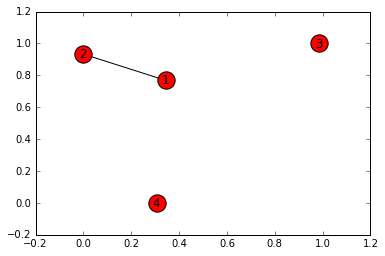

In [3]:
G.add_nodes_from([3, 4])
nx.draw_networkx(G)
plt.show()

### To add additional edges to the graph

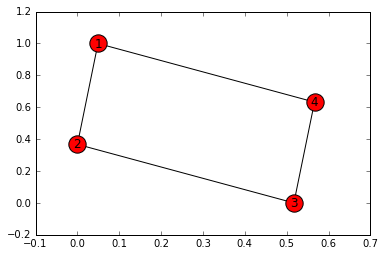

In [4]:
G.add_edge(3,4)
G.add_edges_from([(2, 3), (4, 1)])
nx.draw_networkx(G)
plt.show()

To obtain a collection of nodes in the graph, just use the .nodes() method. Similarly,
.edges() gives you the list of edges as a list of connected nodes:

In [5]:
G.nodes()

[1, 2, 3, 4]

In [6]:
G.edges()

[(1, 2), (1, 4), (2, 3), (3, 4)]

To represent or descibe graphs, we can use an adjacency list. It lists the
neighbors of every node, that is, list[0] contains the adjacency nodes of the first
node, as in G.nodes():

In [7]:
G.adjacency_list()

[[2, 4], [1, 3], [2, 4], [1, 3]]

To make the description self-contained, you can represent the graph as a dictionary
of lists. Here, the nodes' names are the dictionary keys, and their values are the
nodes' adjacency lists:

In [8]:
nx.to_dict_of_lists(G)

{1: [2, 4], 2: [1, 3], 3: [2, 4], 4: [1, 3]}

We can describe a graph as a collection of edges. In the output,
the third element of each tuple is the attribute of the edge. In fact, every edge can
have one or more attributes (such as weight, cardinality, and so on). Since we
created a very simple graph, in following example, we have no attributes.

In [9]:
nx.to_edgelist(G)

[(1, 2, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})]

We can describe a graph as a NumPy Matrix.If the matrix contains a 1 in
the (i, j) position, it means that there is a link between the i and j nodes. Since the
matrix usually contains very few ones (compared to the number of zeros), it's usually
represented as a sparse (SciPy) matrix.

In [10]:
nx.to_numpy_matrix(G)

matrix([[ 0.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  0.]])

In [11]:
print(nx.to_scipy_sparse_matrix(G))

  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1


An important measure of a node in a graph is its degree. In an undirected graph,
it represents the number of links the node has. For directed graphs, there are two
types of degree: in-degree and out-degree. These respectively count the inbound and
outbound links of the node.

In [12]:
G.degree()

{1: 2, 2: 2, 3: 2, 4: 2}

Let's add a node (to unbalance the graph) and calculate
the nodes' degrees, as follows:

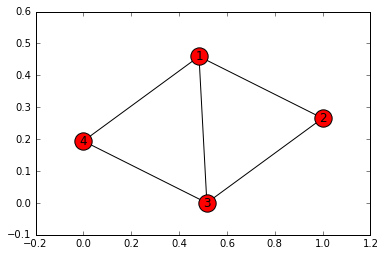

In [13]:
G.add_edge(1,3)
nx.draw_networkx(G)
plt.show()

In [14]:
#degree ot the nodes is as follows:
G.degree()

{1: 3, 2: 2, 3: 3, 4: 2}

For large graphs, this measure is impractical since the output dictionary has an
item for every node. In such cases, a histogram of the nodes' degree is often used
to approximate its distribution.

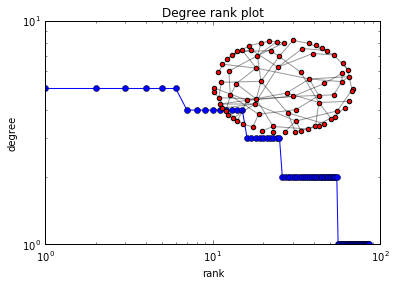

In [15]:
G = nx.gnp_random_graph(100,0.02)

degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

## Graph algorithms

Krackhardt Kite graph is a dummy graph containing 10 nodes, and it is typically used to proof graph
algorithms. Krackhardt is the creator of the structure, which has the shape of a kite.
It's composed of two different zones. In the first zone (composed of nodes 0 to 6), the
nodes are interlinked; in the other zone (nodes 7 to 9), they are connected as a chain:

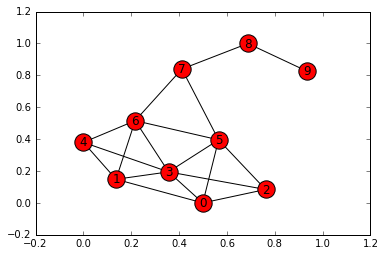

In [16]:
G = nx.krackhardt_kite_graph()
nx.draw_networkx(G)
plt.show()

Two nodes of a graph are connected if there is at least a
path (that is, a sequence of traversed nodes) between them.
If at least a path exists, the shortest path between the two nodes is the one with the
shortest collection of traversed nodes.

In [17]:
print (nx.has_path(G, source=1, target=9))
print (nx.shortest_path(G, source=1, target=9))
print (nx.shortest_path_length(G, source=1, target=9))

True
[1, 6, 7, 8, 9]
4


### Node centrality 
roughly represents the importance of
the node inside the network. It gives an idea about how well the node connects the
network. 

Some types of centrality are:
    


#### Betweenness centrality 
gives an idea about the
number of shortest paths in which the node is present. Nodes with high
betweenness centrality are the core components of the network, and many
shortest paths route through them.

In [18]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

The highest betweenness centrality is achieved by the
node 7. It seems very important since it's the only node that connects the
elements 8 and 9 (it's their gateway to the network). On the contrary, nodes
like 9, 2, and 4 are on the extreme border of the network, and they are not
present in any of the shortest paths of the network. Therefore, these nodes
can be removed without affecting the connectivity of the network.

#### Degree centrality 
is simply the percentage of the
vertexes that are incident upon a node. 

Note that in directed graphs, there are
two degree centralities for every node: in-degree and out-degree centrality.

In [19]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

Node 3 has the highest degree centrality since it's the node
with the maximum number of links (it's connected to six other nodes).
On the contrary, node 9 is the node with the lowest degree since it has only
one edge.

#### Closeness centrality
calculate the shortest
path distance for every node to all other nodes, average it, divide the average by the
maximum distance, and take the inverse of that value. It results in a score
between 0 (the greater average distance) and 1 (the lower average distance).

In [20]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

for node 9, the shortest path distances are [1, 2, 3, 3, 4, 4, 4,
5, 5]. The average (3.44) is then divided by 5 (the maximum distance) and
subtracted from 1, resulting in a closeness centrality score of 0.31.

The nodes with high closeness centrality are 5, 6, and 3. In fact, they are the
nodes that are present in the middle of the network and, on an average, they
can reach all the other nodes with a few hops. The lowest score belongs to
node 9. In fact, its average distance to reach all the other nodes is pretty high.

#### Eigenvector centrality:

If the graph is directed e.g. the nodes represent web
pages and the edges represent page links. It gives to every node a measure of how important the
node is from the point of view of a random surfer. Its name derives from the
fact that if you think of the graph as a Markov Chain, the graph represents
the eigenvector associated with the greatest eigenvalue. Therefore, from this
point of view, this probabilistic measure represents the static distribution of
the probability of visiting a node.

In [21]:
nx.eigenvector_centrality(G)

{0: 0.35220918419838565,
 1: 0.35220918419838565,
 2: 0.28583482369644964,
 3: 0.481020669200118,
 4: 0.28583482369644964,
 5: 0.3976909028137205,
 6: 0.3976909028137205,
 7: 0.19586101425312444,
 8: 0.04807425308073236,
 9: 0.011163556091491361}

nodes 3 and 9 respectively have the highest and the lowest
scores according to the eigenvector centrality measure. Compared to the
degree centrality, the eigenvalue centrality gives an idea about the static
distribution of the surfers across the network because it considers, for each
node, not only the directly connected neighbors (as in the degree centrality),
but also the whole structure of the network. If the graph represented web
pages and their connections, this makes them the most/least (probable)
visited pages.

#### Clustering coefficient
is
the proportion of the node's neighbors that are also neighbors with each other (that
is, the proportion of possible triplets or triangles that exists). Higher values indicate
higher cliquishness. It's named this way because it represents the degree to which
nodes tends to cluster together.

In [22]:
nx.clustering(G)

{0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0.0,
 9: 0.0}

Higher values are seen in the highly connected sections of the graph and lower
values in the least connected areas.

## The Louvain method for community detection in large networks

The method is a greedy optimization method that attempts to optimize the "modularity" of a partition of the network. The optimization is performed in two steps. First, the method looks for "small" communities by optimizing modularity locally. Second, it aggregates nodes belonging to the same community and builds a new network whose nodes are the communities. These steps are repeated iteratively until a maximum of modularity is attained and a hierarchy of communities is produced. Although the exact computational complexity of the method is not known, the method seems to run in time O(n log n) with most of the computational effort spent on the optimization at the first level. 

Modularity score falls between -0.5 and +1.0;
the higher the value, the better is the division (there is a dense intragroup connectivity,
and a sparse intergroup connectivity).

Community library is easy to use and allows to perform community detection on an undirected graph in less than 3 lines of code!

https://pypi.python.org/pypi/python-louvain/0.3

Community 0
[0, 2, 3, 6, 8, 11, 21, 29, 36, 41, 45, 51, 60, 61, 76, 77, 83, 91, 97]
Community 1
[1, 16, 22, 24, 25, 39, 44, 47, 52, 58, 59, 68, 71, 75, 94, 98, 99]
Community 2
[4, 27, 40, 42, 46, 54, 55, 56, 64, 69, 74, 85, 86, 88, 92]
Community 3
[5, 23, 33, 57, 70, 72, 82, 95]
Community 4
[7, 20, 32, 43, 65, 66, 93]
Community 5
[9, 15, 19, 26, 50, 67, 81, 87]
Community 6
[10, 12, 14, 18, 31, 49, 53, 63, 78, 79]
Community 7
[13, 28, 35, 48, 62, 73, 90, 96]
Community 8
[17, 30, 34, 37, 38, 80, 84, 89]


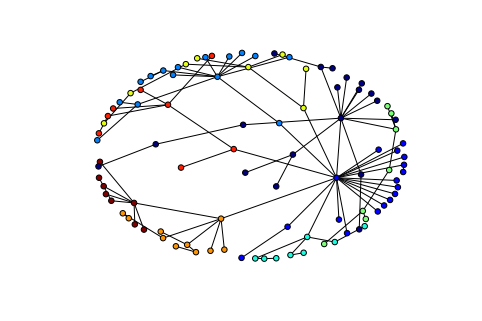

Modularity score: 0.7866034078155291


In [23]:
#Let us consider a random network with 100 nodes
import community # Community module for community detection and clustering

G = nx.powerlaw_cluster_graph(100, 1, .4)
partition = community.best_partition(G)

for i in set(partition.values()):
   print ("Community", i)
   members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == i]
   print (members)

values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

print ("Modularity score:", community.modularity(partition, G))

A good article is
https://blog.dominodatalab.com/social-network-analysis-with-networkx/

The first output of the program is the list of the communities detected in the graph
(each community is a collection of nodes). In this case, the algorithm detected
eight groups. We wanted to highlight that we didn't specify the number of output
communities that we were looking for, but it was automatically decided by
the algorithm.

Then, we printed the graph, assigning a different color to each community. You can
see that the colors are pretty homogeneous on the edge nodes.

Lastly, the algorithm returns the modularity score of the solution: 0.75 (that's a pretty
high score).

### Graph loading, dumping, and sampling

As in machine learning datasets, even graphs have standard formats for their storing,
loading, and exchanging. In this way, you can create a graph with NetworkX, dump
it to a file, and then load and analyze it with Gephi.

https://gephi.org/

Future project: ( http://mark-kay.net/2014/08/15/network-graph-of-twitter-followers/ )

One of the most frequently used formats is Graph Modeling Language (GML).

Now, let's see how to dump a graph to GML file:

In [24]:
dump_file_base = "dumped_graph"
# Be sure the dump_file file doesn't exist
def remove_file(filename):
    import os
    if os.path.exists(filename):
        os.remove(filename)

In [25]:
#Create a graph(the kite) 
G = nx.krackhardt_kite_graph()

In [26]:
# GML format write and read
#Beyond GML there are a variety of formats with different features
GML_file = dump_file_base + '.gml'
remove_file(GML_file)
#compare the original and loaded structure, making sure it is equal
nx.write_gml(G, GML_file)
G2 = nx.read_gml(GML_file)

assert(G.edges() == G2.edges())

Note that some of them remove information pertaining to the network
(like edge / node attributes). Similar to the write_gml function and its equivalent
read_gml are the following ones (the names are self-explanatory):

• The adjacency list (read_adjlist and write_adjlist)

• The multiline adjacency list (read_multiline_adjlist and write_
multiline_adjlist)

• The edge list (read_edgelist and write_edgelist)

• GEXF (read_gexf and write_gexf)

• Pickle (read_gpickle and write_gpickle)

• GraphML (read_graphml and write_graphml)

• LEDA (read_leda and parse_leda)

• YAML (read_yaml and write_yaml)

• Pajek (read_pajek and write_pajek)

• GIS Shapefile (read_shp and write_shp)

• JSON (load/loads and dump/dumps provides JSON serialization)

We sample graphs
because working with large graphs is sometimes impractical (remember that in the
best case, the processing time is proportional to the graph size). Therefore, it's better
to sample it, create an algorithm by working on the small-scale scenario, and then
test it on the full-scale problem. There are several ways to sample a graph. Here,
we're going to introduce you to the three most frequently used techniques.

In the first technique, which is known as node sampling, a limited subset of nodes,
along with their links, form the sampled set.

In the second technique, which is
known as link sampling, a subset of links forms the sampled set. Both these methods
are simple and fast, but they might potentially create a different structure of the
network. 

The third method is named snowball sampling ( not a part of NetworkX). The initial node, all its
neighbors, and the neighbors of the neighbors (expanding the selection this way
until we reach the maximum traversal depth parameter) form the sampled set.
In other words, the selection is like a rolling snowball.

In this example, we will subsample the LiveJournal network by starting with
the person with the most popular male name in United states Noah (https://en.wikipedia.org/wiki/List_of_most_popular_given_names#Male_names_2) and then expanding recursively two (in the first
example),for two times for taylor (in the second example) and andrea,three times (in the last example). 

In the latter instance, every link
is followed by a probability of 20 percent, thus decreasing the retrieval time. Here
is an example that demonstrates the same:

Reching depth 0
 new nodes to investigate: ['noah']
Reching depth 1
 new nodes to investigate: ['ilovebritt', 'andrewkendall', 'spedy', 'koldkitty', 'blondiefx3', 'coolclint', '317537', 'atarigeek', 'dictatorcari', 'happy_endings', '_quizzical', 'brunettebabe895', 'ilvesports11', 'maybejustonce', 'pale_blue_eyes', 'fivehourslater', 'drawingonsound', 'superqt1988', 'carebearkl23', 'coloursandkids', 'rejectforlife', 'erikagraessley', 'strongwilled', 'xhomerx', 'fakeblackstars', 'explosive', '80', 'linear_lively', 'kore', 'jove_who_else', 'hotdog32836', 'bballgurl33', 'robertoisstupid', 'digital_divaz', 'rescue_yourself', 'mochevis', 'beatonthebrett']


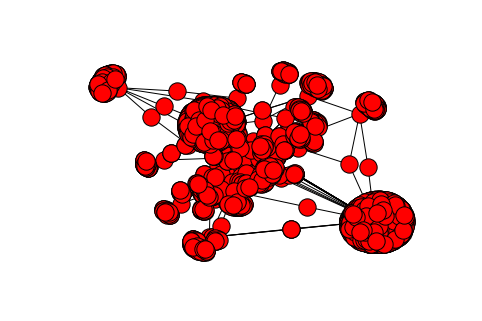

In [27]:
#Snowball Sampling

import networkx as nx

def get_json_name(graph, name):
    """
    Download the LiveJournal page of name, and adds the related links to the graph
    Note: this function modifies the graph!
    """
    from urllib.request import urlopen

    response = urlopen('http://www.livejournal.com/misc/fdata.bml?user=' + name)
    valid_lines = [line for line in response.read().decode().splitlines() if (len(line) > 0 and not line.startswith('#'))]
    for line in valid_lines:
        chunks = line.split(" ")
        if chunks[0] == ">":
            graph.add_edge(name, chunks[1])
        else:
            graph.add_edge(chunks[1], name)
    return


def snowball_sampling(graph, max_depth, central_name, sampling_rate=1.0):
    """
    Recursively add nodes, one depth at the time, till max_depth is reached
    Note: this function modifies the graph!
    """
    import random

    graph.add_node(central_name)

    for depth in range(max_depth):
        print ("Reching depth", depth)
        nodes_that_depth = [node for node in graph.nodes() if
                            nx.shortest_path_length(graph, source=central_name, target=node) == depth]
        print (" new nodes to investigate:", nodes_that_depth)

        for node in nodes_that_depth:

            if len(nodes_that_depth) == 1:
                get_json_name(graph, node)

            elif random.random() <= sampling_rate:
                get_json_name(graph, node)

            else:
                # Sampling stops here
                pass


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    G = nx.Graph()
    snowball_sampling(G, 2, 'noah')
    nx.draw(G)
    plt.show()

Reching depth 0
 new nodes to investigate: ['taylor']
Reching depth 1
 new nodes to investigate: ['mfollowillj', 'mylese', 'mshendricks', 'stefanijoanne', 'g_nyquist', 'nelsonjordy', 'jghedlund', 'a_breckenridge', 'demd', 're', 'kysgallner', 'gadot', 'johnmmarr', 'davefranco', 'thepostoffice', 'cthr', 'jradin', 'smollett', 'heathertonbe', 'asvyalitsyna', 'ryanjamesjarman', 'mosshartan', 'ro_dawson', 'chris_shipton', 'cmpratt', 'johnstonr', 'ilucas', 'johnrzeznik', 'harington', 'amandaseyf', 'chrish', 'vancamp', 'grillo', 'haimeste', 'aubreyplaza', 'lawrencej', 'heathertonerinb', 'meganfox', 'ahbreckenridge', 'steph_shrag', 'zdeutch', 'spektrrr', 'bambiblyth', 'odetteyustman', 'zachary_hanson', 'ausbutler', 'aheard', 'kinseya', 's_turner', 'kcaroline', 'seyfriedamanda', 'justicevdawn', 'murraym', 'ddevonnel', 'loganlw', 'jonradtke', 'salmo8', 'issachansonc', 'ndobrev', 'hayden_lp', 'mbpsexiest', 'nikki_dufresne', 'jessicastam', 'kevinhastings', 'maximilian', 'matt_berninger', 'poxleitne

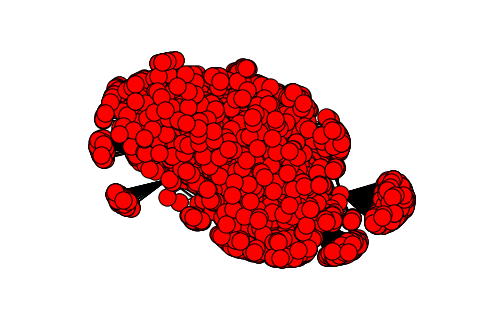

In [31]:
my_social_network = nx.Graph()
snowball_sampling(my_social_network, 2, 'taylor' , sampling_rate=0.2)
nx.draw(my_social_network)
plt.show()

Reching depth 0
 new nodes to investigate: ['andrea']
Reching depth 1
 new nodes to investigate: ['poppinpink53', 'stuffbyduff121', 'heather6902', 'jennijones016', 'lachickavonnie', 'danpittenger', 'forevagrow101', 'madragegab', '42lean_on_me42', 'lush_surf', 'qtballplayer', 'jasmine2002', 'rubygurl292', 'polkadotty11890', 'n0d0ubt177', 'hugsxxxkisszxxx', 'varsitymaterial', 'dancerbabii', 'shortyxoxoxox', 'sammyg49', 'soccerkidsg', 'rasabah', 'exclusivemind', 'evanescence_777', 'superqt1988', 'adib', 'kristenrogers', 'worldwecreated', 'alissajen', 'hazeleyez69', 'imalayu2pac', 'laurafred', 'kittykat96960', 'pinkpenguin323', 'jaebaeli', 'huggybear23', '2_erika_2', 'independentplay', 'ahscheerbabe03', 'taponmyg', 'christa45hand', 'laiseym', 'busmagnate45', 'richay', 'bballsux', 'bluetango', 'ivonnedezwart', 'sydney_sweetie1', 'hatcherfan', 'willwork4hockey', 'winged_beast', 'skinny_gurlie', 'lilfishygirl', 'meg_mouse', 'angelpea00', 'winterbaby1304', 'xsweet_melx', 'diver_down', 'omygosh

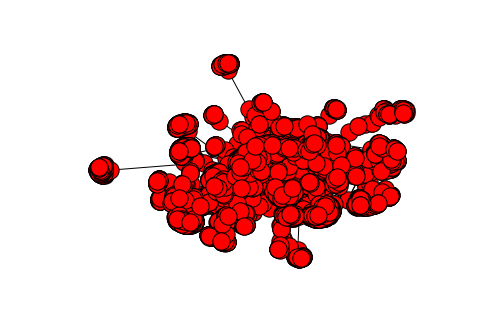

In [34]:
my_sampled_social_network = nx.Graph()
snowball_sampling(my_sampled_social_network, 3, 'andrea', sampling_rate=0.5)
nx.draw(my_sampled_social_network)
plt.show()